# Loan_Status_Prediction

Dataset used : Loan-status-pred

link to the dataset : https://www.kaggle.com/datasets/ninzaami/loan-predication

ML Model : Support Vector Machine (SVM)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [3]:
# Data collection and processing
df = pd.read_csv('Datasets/Loan-status-pred.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
type(df)

In [ ]:
df.shape

In [ ]:
df.describe()

In [ ]:
# Viewing and Dealing with the null values in the datset
df.isnull().sum()

In [71]:
df = df.dropna()
print(df.isnull().sum())
print(df.head())
print(df.shape)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
    Loan_ID  Gender  Married Dependents  Education  Self_Employed  \
1  LP001003       1        1          1          1              0   
2  LP001005       1        1          0          1              1   
3  LP001006       1        1          0          0              0   
4  LP001008       1        0          0          1              0   
5  LP001011       1        1          2          1              1   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0           

In [ ]:
# Lable Encoding
df.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [62]:
df['Property_Area'].unique()

array([0, 1, 'Semiurban'], dtype=object)

In [ ]:
df['Dependents'].value_counts()

In [ ]:
# Label encoding or replacing the dependents column
df = df.replace(to_replace='3+', value=4)
df['Dependents'].value_counts()

<Axes: xlabel='Education', ylabel='count'>

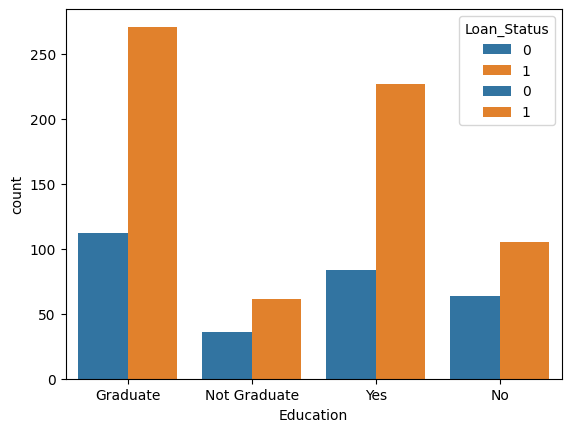

In [ ]:
# Visual representation of data

# 1. Education and loan status1
sns.countplot(x='Education',hue='Loan_Status',data=df)

sns.countplot(x='Married',hue='Loan_Status',data = df)

In [63]:
# converting the categorial values into numerical values
df.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},'Education':{'Graduate':1,'Not Graduate':0},'Property_Area':{'Rural':0,'Urban':1,'Semiurban':0.5}},inplace=True)
df.head()

/tmp/ipython-input-2189687571.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},'Education':{'Graduate':1,'Not Graduate':0},'Property_Area':{'Rural':0,'Urban':1,'Semiurban':0.5}},inplace=True)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0.0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1.0,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1.0,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1.0,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1.0,1


In [73]:
df.head(147)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0.0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1.0,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1.0,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1.0,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,LP001637,1,1,1,1,0,33846,0.0,260.0,360.0,1.0,0.5,0
184,LP001639,0,1,0,1,0,3625,0.0,108.0,360.0,1.0,0.5,1
185,LP001640,1,1,0,1,1,39147,4750.0,120.0,360.0,1.0,0.5,1
186,LP001641,1,1,1,1,1,2178,0.0,66.0,300.0,0.0,0.0,0


In [64]:
# Seperating the data and label
X = df.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = df['Loan_Status']
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [65]:
# spliting the data into train and test set
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)
print(X.shape,X_train.shape,X_test.shape)

(480, 11) (432, 11) (48, 11)


In [66]:
# training the model using SVM model
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [67]:
# Model evaluation
# Accuracy score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)
print('Accuracy on training data : ',training_data_accuracy)

# Accuracy score on test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)
print('Accuracy on test data : ',test_data_accuracy)

Accuracy on training data :  0.8078703703703703
Accuracy on test data :  0.8333333333333334


In [74]:
# Making a predictive system
input_data = (1,1,1,1,1,2178,0.0,66.0,300.0,0.0,0.0)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = classifier.predict(input_data_reshaped)
print(prediction)

[0]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
